# CS 5394 - Project 1
## Predicting the Global Population in 2122
### Amory Weinzierl, Randolph Rankin, Sofia Murillo, Jennifer Carballo

---
## Background

### Introduction

What will the global population be in 2122? This question may seem abstract, however our best answer—and how we find it—is critical. Population projection informs a variety of economic and social policy. From businesses seeking to recognize trends in the global workforce, to governments forecasting resource demand, understanding our population in the future directly impacts decisions made today. 

Projecting the population is a difficult problem to solve. How can we predict something that is massively affected by erratic social variables? In this exploration, we'll attempt to model how the global population may grow through an exploration of historic demographic data. Ultimately through our examination, we intend to predict a population estimate for the year 2122. 

### Population Growth Factors

There are numerous existing models for population projection from different organizations. In our initial research, we encountered projections from government agencies such as the UN and US Census Bureau, to academic research institutions such as the University of Washington. Each of these models takes into account demographic indicators and how they appear to affect population trends. Indicators can describe many dimensions of a population, from its quality of life, quality of education, or other factors of its development. One study from the University of Washington even seeks to improve upon the current models for population projection by considering reproductive indicators, such as access and availability of contraception.

Considering these indicators is logical. An observed phenomenon in demography occurs in which a population's economic development, technological advancements, access to healthcare, and quality of education is accompanied by a shift in population growth. This is referred to as *demographic transition*. During a population's demographic transition, death rates decline steadily, leading to an initial population boom. As development continues, fertility rates fall, causing population growth to slow. Demographic transition explains why many models based on demographic indicators suggest a population peak in the coming century, followed by a potential decline.

### Chosen Model

For our exploration, we’ve elected to consider demographic indicators of development to inform our model. This presents a complicated problem, however: quantifying development. With this direction for our model, there are hundreds of possible indicators we could have selected—infant mortality rates, total fertility rates, population sex ratios, to name a few. It’s difficult, however, to ensure that our indicators will adequately describe multiple dimensions of a population’s development. Additionally, any indicator may have varying relation with population growth from country to country. For our purposes, we sought to find indicators that could be generalized globally.

To solve this problem, we decided to build our model upon the Human Development Index, which is a measure formulated by the UN in order to provide a practical evaluation of a nation’s development. We believe this will provide a reasonable basis for our model. The index is built upon several demographic indicators, each of which is summarized into a single score. For our model, we hope to generalize the Human Development Index on a global scale, project each component of the index, and use current trends between development and population growth to predict a population growth rate.

---
## About the Data

### Definition of Indicators

Our model is dependent on four primary indicators of human development:

> **Life Expectancy** – The average number of years that a newborn could expect to live if he or she were to pass through life subject to the age-specific mortality rates of a given period.
> 
> **Mean Years of Schooling** – The average number of years of total schooling of the adult-aged population.
> 
> **Expected Years of Schooling** – The expected number of years of total school that a newborn could expect to complete under current education trends.
> 
> **Gross National Income (GNI) per Capita** – The total income received by a country over the course of a year, divided among the mid-year population of each country.

### The Human Development Index (HDI)

The Human Development Index is a measure of a country's development, as created by the Human Development Report Office of the United Nations Development Programme (UNDP) in 1990. The index intends to summarize a country's development based on three dimensions: a citizen's quality of life, level of education, and access to income.

#### Calculating the HDI

When calculating HDI, the UNDP establishes benchmark values to assert the expected range an indicator may fall within. These benchmarks are referred to as the *minimum* and *goalpost* values.

Currently, these benchmark values are as follows:

| Indicator                   | Minimum Value | Goalpost Value |
|-----------------------------|---------------|----------------|
| Life Expectancy             | 20 years      | 85 years       |
| Mean Years of Schooling     | 0 years       | 18 years       |
| Expected Years of Schooling | 0 years       | 15 years       |
| GNI per Capita              | \$100         | \$75,000       |

These values are used to calculate three sub-indices for each dimension of the total HDI.

**Life Expectancy Index**

The life expectancy index ($\textit{LEI}$) is calculated as:

> $\textit{LEI} = \dfrac{\textrm{LE} - 20}{85 - 20}$ 
> 
> *where $\textrm{LE}$ is a particular life expectancy value*

**Education Index**

The education index ($\textit{EI}$) is calculated as:
 
> $\textit{EI} = \dfrac{ \dfrac{\textrm{MYS}}{15} + \dfrac{\textrm{EYS}}{18}}{2}$ 
> 
> *where $\textrm{MYS}$ and $\textrm{EYS}$ represent mean and expected years of schooling respectively*

**Income Index**

The income index ($\textit{II}$) is calculated as:

> $\textit{II} = \dfrac{\ln(\textrm{GNIpC}) - \ln(100)}{\ln(75000) - \ln(100)}$
> 
> *where $\textrm{GNIpC}$ represents the GNI per capita*

**Human Development Index**

The final Human Development Index ($\textit{HDI}$) is calculated as the gemoetric mean of the three previous indicies:

> $\textit{HDI} = \sqrt[3]{\textit{LEI} \cdot \textit{EI} \cdot \textit{II}}$

This provides us with a succinct score to summarize the relative development of a population against a theoretical goalpost.

---
## Preparing the Data

First, we will import the necessary packages needed for our exploration and create a `DataFrame` from our dataset.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
read_df = pd.read_csv('data/aggregate_hdi_indicators_with_population.csv')

read_df.head()

,Entity,Code,Year,Population (historical estimates),"Fertility rate (Complete Gapminder, v12) (2017)","Mortality rate, infant (per 1,000 live births)",Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)",Actual Human Development Index (UNDP)
0,Afghanistan,AFG,1800,3280000.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1801,3280000.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1802,3280000.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1803,3280000.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1804,3280000.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


From this preview of the data, we're able to see the various demographic variables provided. For the purposes of our exploration, we'll only need columns from this `DataFrame` related to calculating the HDI.

In [3]:
indicators_raw = read_df.drop(columns = ['Fertility rate (Complete Gapminder, v12) (2017)', 'Mortality rate, infant (per 1,000 live births)', 'Code', 'Actual Human Development Index (UNDP)'])
indicators_raw.head()

,Entity,Year,Population (historical estimates),Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)"
0,Afghanistan,1800,3280000.0,NaN,NaN,NaN,NaN
1,Afghanistan,1801,3280000.0,NaN,NaN,NaN,NaN
2,Afghanistan,1802,3280000.0,NaN,NaN,NaN,NaN
3,Afghanistan,1803,3280000.0,NaN,NaN,NaN,NaN
4,Afghanistan,1804,3280000.0,NaN,NaN,NaN,NaN


What remains are the four metrics used to calculate the HDI. We can see from the example above, however, that earlier data may only contain a historic population estimate. Because we'll be looking at the HDI as an indicator for population growth, we'll drop any rows for which no HDI component data exists.

In [4]:
indicators_raw.dropna(thresh=4, inplace=True)
indicators_raw.head()

,Entity,Year,Population (historical estimates),Life expectancy,"Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))",Expected Years of Schooling (years),"GNI per capita, PPP (constant 2017 international $)"
70,Afghanistan,1870,4142928.0,NaN,0.01,NaN,NaN
75,Afghanistan,1875,4247357.0,NaN,0.01,NaN,NaN
80,Afghanistan,1880,4354370.0,NaN,0.01,NaN,NaN
85,Afghanistan,1885,4464010.0,NaN,0.01,NaN,NaN
90,Afghanistan,1890,4576341.0,NaN,0.01,NaN,NaN


Now, the rows remaining will contain at least one datapoint required to calculate the HDI. Although an HDI will be unavailable for rows containing any null values, we've chosen to keep all data for any of the indicators. This will be helpful later in our exploration as we attempt to project a future HDI.

---
## Precursory Calculations

Our dataset is currently segmented by country. However, we're more interested in this exploration to see how these indicators have changed globally. For that reason, we wish to use this country-level data to find global averages for each indicator. We'll achieve this by taking a weighted mean for each indicator for each year.

### Weighting the Indicators

For each datapoint, we'll assign a weight to its value. That weight is assigned as follows:

$\gamma_{I, \alpha, Y} = \dfrac{P_{\alpha, Y}}{\sum{P_{I, Y}}}$

*Where $\gamma_{I, \alpha, Y}$—or the weight of a given indicator, $I$, for some country $\alpha$ on year $Y$—can be calculated as the ratio between $P_{\alpha, Y}$—the population of $\alpha$ on year $Y$—and the sum of all values $P_{I, Y}$, or the total population of all countries on year $Y$ with available data for indicator $I$.*

By determining the indicator weight for each data point, we're able to calculate an indicator's mean, weighted by a country's population, on a particular year $M_{I,Y}$, as the sum of all relevant values of $\gamma_{I, \alpha, Y}$.

First, let's reformat our columns. Then, we'll find each data point's component of its indicator's weighted average.

In [5]:
# Rename the columns for readability

col_dict = {
    'Entity': 'country',
    'Year': 'year',
    'Population (historical estimates)': 'population',
    'Life expectancy': 'life_expectancy',
    'Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))': 'mean_yos',
    'Expected Years of Schooling (years)': 'expected_yos',
    'GNI per capita, PPP (constant 2017 international $)': 'gni_per_capita'
}

indicators_raw.rename(columns=col_dict, inplace=True)

In [6]:
# Introduce a function to calculate a column with weighted average components

def calculated_weighted_avg_component(indicator_col, df):    
    # Locate rows in the dataframe with non-null indicator values and find the total population by year
    indicator_pop_total = df.population.loc[indicator_col.notna()].groupby(df.year).sum().rename('indicator_pop_total')
    
    # Join the previous row to the dataframe
    df = df.join(indicator_pop_total, on='year')
    
    # Calculate data point's component of its indicator's weighted average     
    return (df.population / df.indicator_pop_total) * indicator_col


In [7]:
# Use the previously defined function to calculated the components of the weighted averages

for col in [indicators_raw.life_expectancy, indicators_raw.mean_yos, indicators_raw.expected_yos, indicators_raw.gni_per_capita]:
    indicators_raw[col.name] = calculated_weighted_avg_component(col, indicators_raw)
    
# Results

indicators_raw.loc[indicators_raw.year == 2000].head()

,country,year,population,life_expectancy,mean_yos,expected_yos,gni_per_capita
200,Afghanistan,2000,20779957.0,0.188879,0.007702,0.020183,NaN
422,Albania,2000,3129246.0,0.037670,0.004639,0.005460,NaN
644,Algeria,2000,31042238.0,0.356935,0.030857,0.055701,49.104221
731,American Samoa,2000,57816.0,0.000670,NaN,NaN,NaN
953,Andorra,2000,65390.0,0.000839,0.000074,0.000116,NaN


The above calculated weights represents each datapoint's contribution to the global average for a particular year.

### Finding Global Indicator Averages

Now that we've calculated the components of each indicator's weighted average, we can group our `DataFrame` by year to find global averages. This will allow us to explore global trends over time.

In [8]:
# Create a dataframe for global indicators by grouping and aggregating by sum

global_indicators = indicators_raw.groupby('year').apply(lambda x: x.sum(min_count=1)).drop(['country', 'year'], axis=1)
                                        # (The lambda is a workaround for pandas' tendancy to treat null values as 0.0)

global_indicators.tail()

,population,life_expectancy,mean_yos,expected_yos,gni_per_capita
year,,,,,
2016,7.464012e+09,72.223146,7.982917,13.188746,15780.970942
2017,7.547849e+09,72.426848,7.998527,13.193718,16215.177712
2018,7.631081e+09,72.612756,NaN,NaN,16586.907293
2019,7.713458e+09,72.783500,NaN,NaN,16421.030285
2020,4.637912e+09,NaN,NaN,NaN,11603.307151


This presents us with a generalized average of our four indicators based on each country's population. Viewing this output, we verify that our data for 2020 is incomplete. We'll drop this row moving forward and only consider data until 2019.

In [9]:
global_indicators.drop(2020, inplace=True)

---
## Projecting HDI Indicators

Now that our `DataFrame` has been condensed into global averages for each indicator, we wish to project these indicators into the future. This will allow us to calculate a theoretical global HDI.

### Visualizing Current Indicators

Due to the nature of our dataset, we have the most complete data for recent decades. By visualizing each indicator, we can get an idea for what range of years provide us with the highest resolution data for each indicator.

In [10]:
# Global plot formatting constants
PLOT_SIZE = (20, 10)
FONT_SIZE = 15

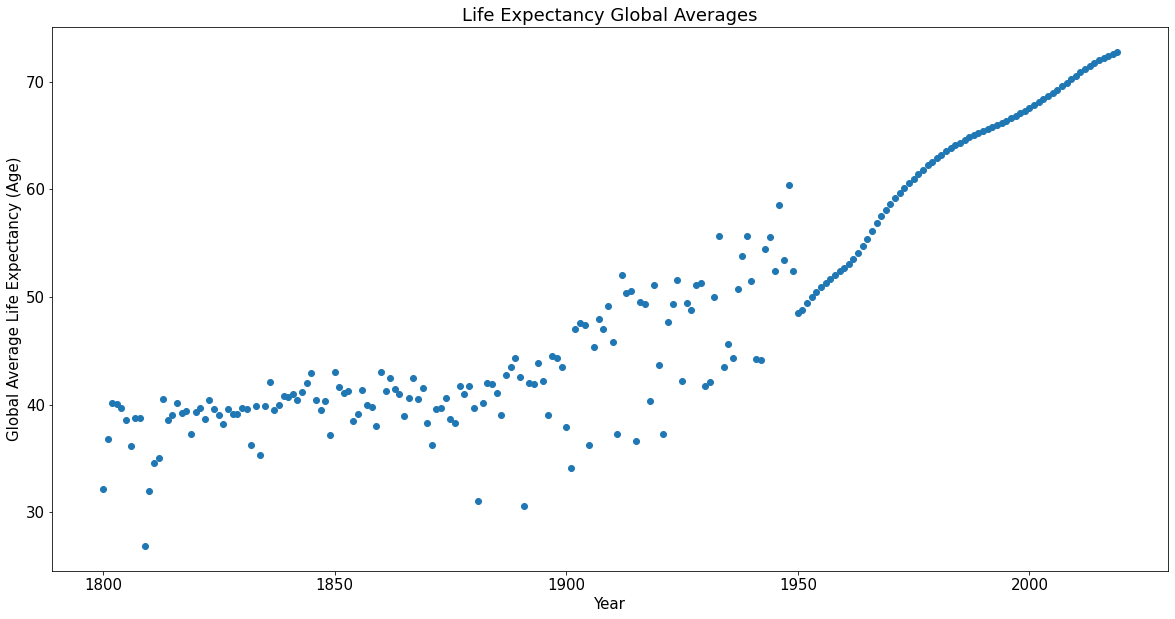

In [11]:
# Visualizing life exepectancy
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(global_indicators.index, global_indicators.life_expectancy)
plt.title('Life Expectancy Global Averages')
plt.xlabel('Year')
plt.ylabel('Global Average Life Expectancy (Age)')
plt.show()

From this visualization, we're able to see that our highest resolution data of life expectancy exists from about 1950 onward.

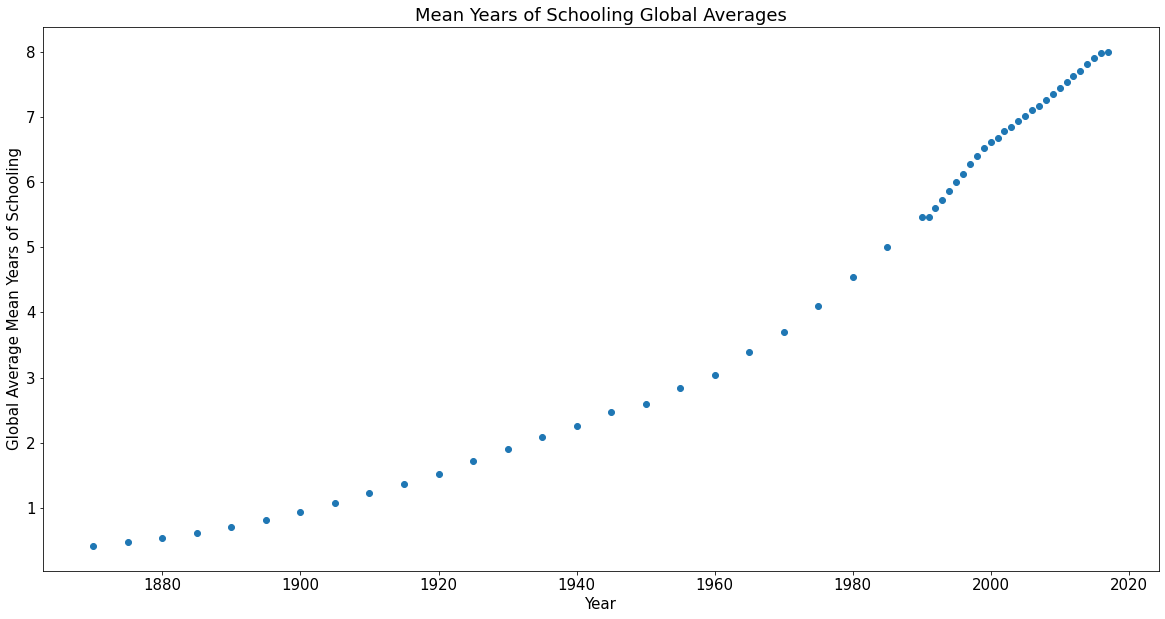

In [12]:
# Visualizing mean years of schooling
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(global_indicators.index, global_indicators.mean_yos)
plt.title('Mean Years of Schooling Global Averages')
plt.xlabel('Year')
plt.ylabel('Global Average Mean Years of Schooling')
plt.show()

Our data for this indicator is most complete for the previous three decades, although remaining data still gives us a good idea of current trends.

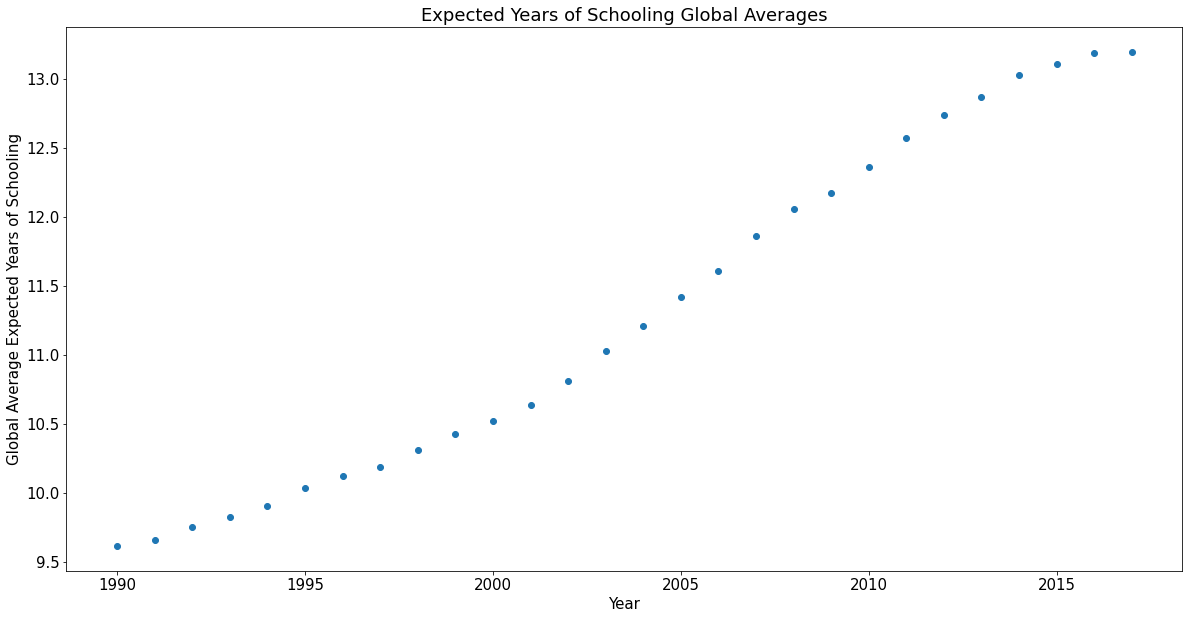

In [13]:
# Visualizing expected years of schooling
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(global_indicators.index, global_indicators.expected_yos)
plt.title('Expected Years of Schooling Global Averages')
plt.xlabel('Year')
plt.ylabel('Global Average Expected Years of Schooling')
plt.show()

The data present for this metric is only available for the past three decades and appears to be of sufficient resolution.

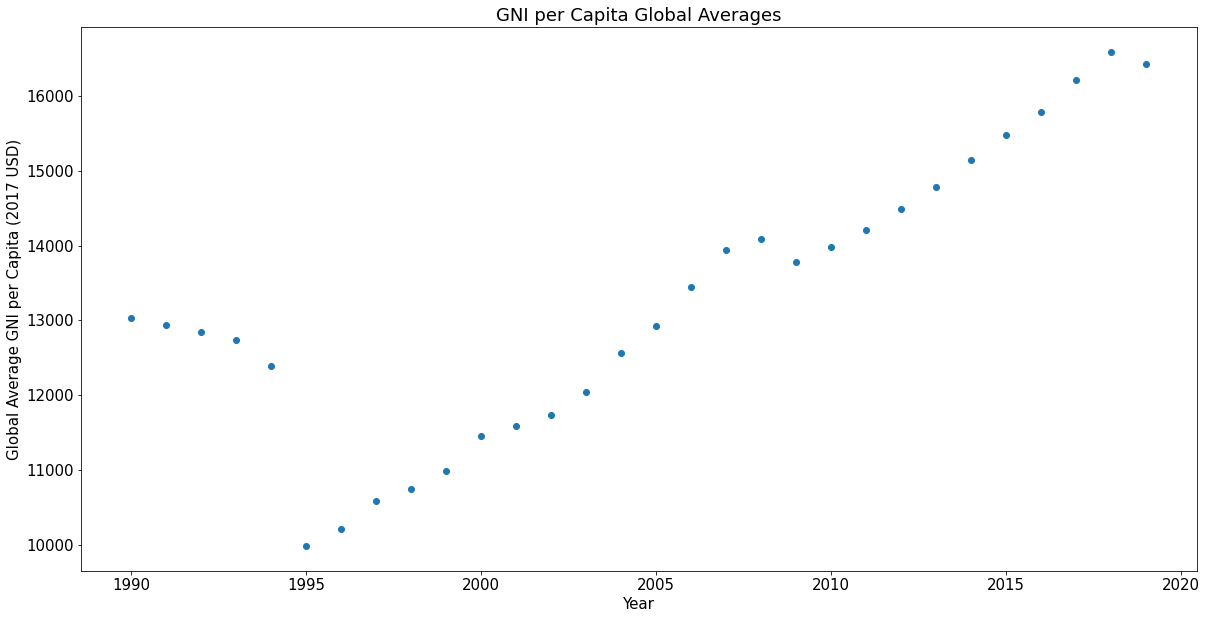

In [14]:
# Visualizing GNI per capita
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(global_indicators.index, global_indicators.gni_per_capita)
plt.title('GNI per Capita Global Averages')
plt.xlabel('Year')
plt.ylabel('Global Average GNI per Capita (2017 USD)')
plt.show()

Limited countries have available data prior to 1995, thus our best idea of current GNI per capita trends are between 1995 and now.

### Determining Trends and Projecting Future Values

Now, we'll fit trend lines to our highest resolution data. Using this trend line, we'll infer the growth of these four indicators based on current trends.

In [15]:
# Define a function to project future values based on a line of best fit

def project_indicator(df, indicator_col_name, min_year=None, log=False, project_until=2122):
    # Take a subset of the data if necessary
    df_manip = df.loc[min_year:2017][[indicator_col_name]].dropna() if min_year else df.loc[:2017][[indicator_col_name]].dropna()
    
    # Find the fit coeffeicient and constant
    if log:
        m, b = np.polyfit(np.log(df_manip.index), df_manip[indicator_col_name], deg=1)
    else:
        m, b = np.polyfit(df_manip.index, df_manip[indicator_col_name], deg=1)
    
    # Create and fill a dataframe column for future years
    max_indicator_year = df[indicator_col_name].dropna().index.max()
    future_data = pd.DataFrame({'year': range(max_indicator_year+1, project_until+1)}).set_index('year')
    future_data[indicator_col_name] = m * np.log(future_data.index) + b if log else m * future_data.index + b
        
    # Return the combined historic and projected data as one column
    return pd.concat([df[[indicator_col_name]], future_data])    

In [16]:
# Calculate projected values and combine into a new dataframe

proj_le_col = project_indicator(global_indicators, 'life_expectancy', min_year=1900, log=True)
proj_myos_col = project_indicator(global_indicators, 'mean_yos', min_year=1990, log=True)
proj_eyos_col = project_indicator(global_indicators, 'expected_yos', log=True)
proj_gnipc_col = project_indicator(global_indicators, 'gni_per_capita', min_year=1995, log=True)


projected_indicators = pd.merge(pd.merge(proj_le_col, proj_myos_col, on='year'), pd.merge(proj_eyos_col, proj_gnipc_col, on='year'), on='year')
projected_indicators.tail()

,life_expectancy,mean_yos,expected_yos,gni_per_capita
year,,,,
2118,96.568852,17.549326,27.973355,43166.605287
2119,96.812482,17.640356,28.114986,43428.258007
2120,97.055997,17.731342,28.256549,43689.787276
2121,97.299398,17.822286,28.398046,43951.193212
2122,97.542683,17.913187,28.539477,44212.475930


So, following current trends, these are the values we would expect for these indicators in 2122. Let's visualize how these projections align with our current data.

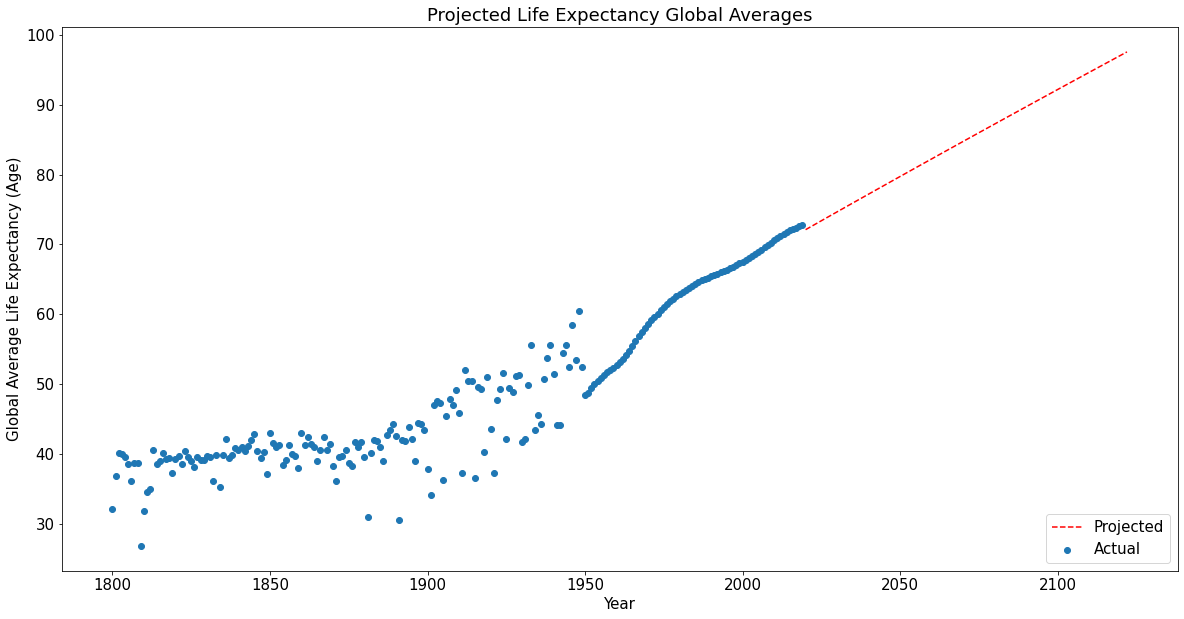

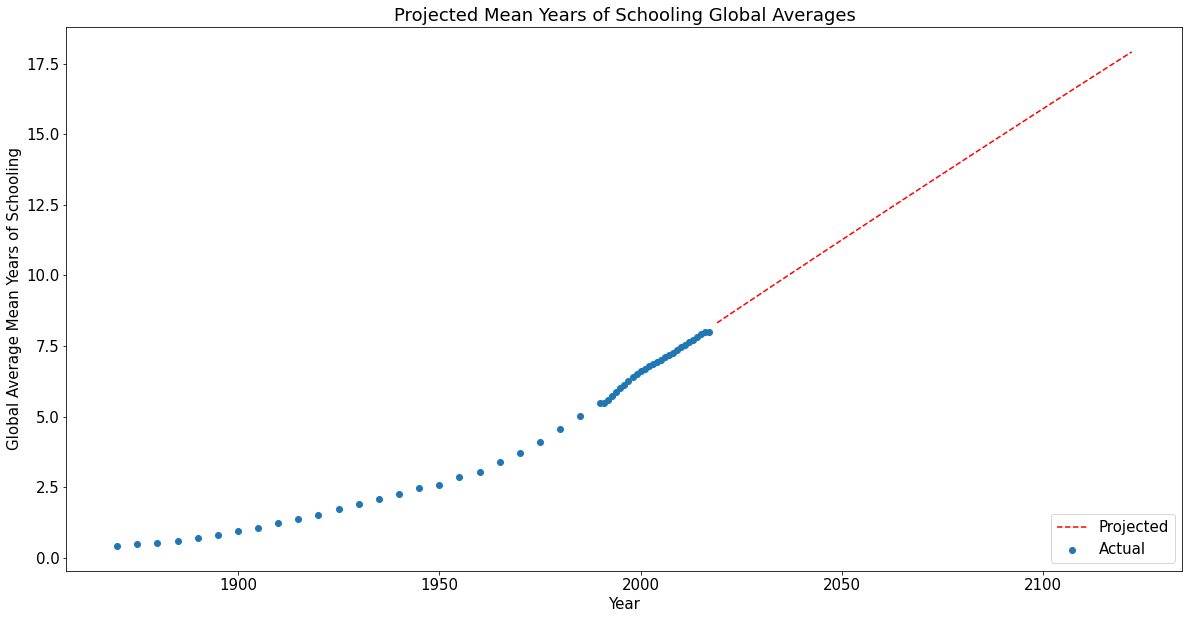

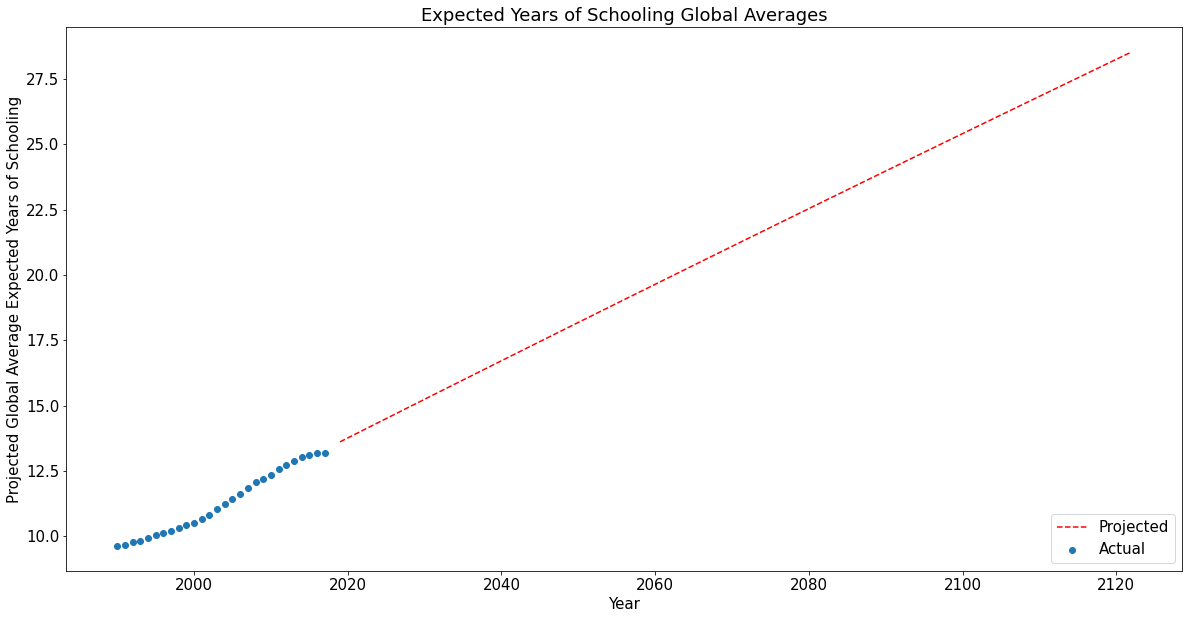

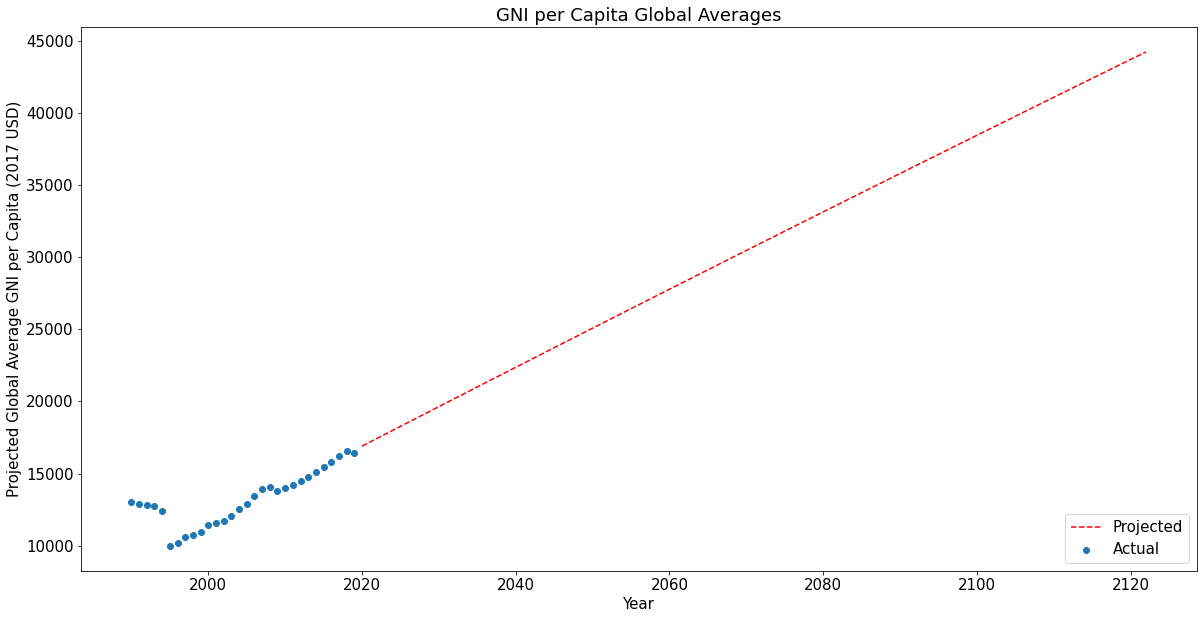

In [17]:
# Visualizing life exepectancy projection
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(global_indicators.index, global_indicators.life_expectancy, label='Actual')
plt.plot(
    projected_indicators.loc[2020:].index, 
    projected_indicators.loc[2020:].life_expectancy, 
    color='red', linestyle='dashed', label='Projected'
)
plt.title('Projected Life Expectancy Global Averages')
plt.xlabel('Year')
plt.ylabel('Global Average Life Expectancy (Age)')
plt.legend(loc='lower right')
plt.show()

# Visualizing mean years of schooling projection
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(global_indicators.index, global_indicators.mean_yos, label='Actual')
plt.plot(
    projected_indicators.loc[2017:].index, 
    projected_indicators.loc[2017:].mean_yos, 
    color='red', linestyle='dashed', label='Projected'
)
plt.title('Projected Mean Years of Schooling Global Averages')
plt.xlabel('Year')
plt.ylabel('Global Average Mean Years of Schooling')
plt.legend(loc='lower right')
plt.show()

# Visualizing expected years of schooling projection
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(global_indicators.index, global_indicators.expected_yos, label='Actual')
plt.plot(
    projected_indicators.loc[2017:].index, 
    projected_indicators.loc[2017:].expected_yos, 
    color='red', linestyle='dashed', label='Projected'
)
plt.title('Expected Years of Schooling Global Averages')
plt.xlabel('Year')
plt.ylabel('Projected Global Average Expected Years of Schooling')
plt.legend(loc='lower right')
plt.show()

# Visualizing GNI per capita projection
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(global_indicators.index, global_indicators.gni_per_capita, label='Actual')
plt.plot(
    projected_indicators.loc[2020:].index, 
    projected_indicators.loc[2020:].gni_per_capita, 
    color='red', linestyle='dashed', label='Projected'
)
plt.title('GNI per Capita Global Averages')
plt.xlabel('Year')
plt.ylabel('Projected Global Average GNI per Capita (2017 USD)')
plt.legend(loc='lower right')
plt.show()

### Calculating Theoretical Adjusted HDI

Covered earlier in our background of the Human Development Index, the UN determines certain benchmarks used to calculate each component of an HDI as an index between 0 and 1. Although we can't be certain how these benchmark values may be calculated in the future, we can use our projections of HDI indicators to get a better idea of what they might be.

To accomplish this, we'll take a look at the difference between today's global HDI indicator averages and the goalpost value currently established by the UN. We'll apply that same delta value to our projected indicator values in 2122 to approximate a theoretical goalpost value for each indicator.

For the minimum benchmark values, we'll use the UN's current minimum benchmarks as we'll want our indexes to adequately measure today's global development against our future predictions.

In [18]:
# Define current indicator benchmarks

CURRENT_LE_MINIMUM, CURRENT_LE_GOALPOST = 20, 85
CURRENT_MYOS_MINIMUM, CURRENT_MYOS_GOALPOST = 0, 15
CURRENT_EYOS_MINIMUM, CURRENT_EYOS_GOALPOST = 0, 18
CURRENT_GNIPC_MINIMUM, CURRENT_GNIPC_GOALPOST = 100, 75000

# Determine goalpost deltas

le_goalpost_delta = CURRENT_LE_GOALPOST - global_indicators.life_expectancy[global_indicators.life_expectancy.dropna().index.max()]
myos_goalpost_delta = CURRENT_MYOS_GOALPOST - global_indicators.mean_yos[global_indicators.mean_yos.dropna().index.max()]
eyos_goalpost_delta = CURRENT_EYOS_GOALPOST - global_indicators.expected_yos[global_indicators.expected_yos.dropna().index.max()]
gnipc_goalpost_delta = CURRENT_GNIPC_GOALPOST - global_indicators.gni_per_capita[global_indicators.gni_per_capita.dropna().index.max()]

# Estimate future goalposts based on current deltas

theoretical_le_goalpost = (projected_indicators.life_expectancy[2122] + le_goalpost_delta).round()
theoretical_myos_goalpost = (projected_indicators.mean_yos[2122] + myos_goalpost_delta).round()
theoretical_eyos_goalpost = (projected_indicators.expected_yos[2122] + eyos_goalpost_delta).round()
theoretical_gnipc_goalpost = (projected_indicators.gni_per_capita[2122] + gnipc_goalpost_delta).round()

# Set theoretical minimums to current minimum

theoretical_le_minimum, theoretical_myos_minimum, theoretical_eyos_minimum, theoretical_gnipc_minimum = \
    CURRENT_LE_MINIMUM, CURRENT_MYOS_MINIMUM, CURRENT_EYOS_MINIMUM, CURRENT_GNIPC_MINIMUM

print(f'Life Expectancy Benchmarks: from {theoretical_le_minimum} to {theoretical_le_goalpost}')
print(f'Mean Years of Schooling Benchmarks: from {theoretical_myos_minimum} to {theoretical_myos_goalpost}')
print(f'Expected Years of Schooling Benchmarks: from {theoretical_eyos_minimum} to {theoretical_eyos_goalpost}')
print(f'GNI per Capita Benchmarks: from {theoretical_gnipc_minimum} to {theoretical_gnipc_goalpost}')

Life Expectancy Benchmarks: from 20 to 110.0
Mean Years of Schooling Benchmarks: from 0 to 25.0
Expected Years of Schooling Benchmarks: from 0 to 33.0
GNI per Capita Benchmarks: from 100 to 102791.0


Now that we have our theoretical benchmarks, we can use our projected indicator data to calculate a theoretical HDI adjusted for our predictions.

In [19]:
# Calculate index values for each component of the HDI
le_index = (projected_indicators.life_expectancy - theoretical_le_minimum) / (theoretical_le_goalpost - theoretical_le_minimum)
myos_index = (projected_indicators.mean_yos - theoretical_myos_minimum) / (theoretical_myos_goalpost - theoretical_myos_minimum)
eyos_index = (projected_indicators.expected_yos - theoretical_eyos_minimum) / (theoretical_eyos_goalpost - theoretical_eyos_minimum)
edu_index = (myos_index + eyos_index) / 2
gnipc_index = (np.log(projected_indicators.gni_per_capita) - np.log(theoretical_gnipc_minimum)) / (np.log(theoretical_gnipc_goalpost) - np.log(theoretical_gnipc_minimum))

# Use components to calculate an adjusted HDI column for our projected indicator values

projected_indicators['theoretical_hdi'] = (le_index * edu_index * gnipc_index) ** (1/3)

projected_indicators.dropna().tail()


,life_expectancy,mean_yos,expected_yos,gni_per_capita,theoretical_hdi
year,,,,,
2118,96.568852,17.549326,27.973355,43166.605287,0.832383
2119,96.812482,17.640356,28.114986,43428.258007,0.834962
2120,97.055997,17.731342,28.256549,43689.787276,0.837535
2121,97.299398,17.822286,28.398046,43951.193212,0.840103
2122,97.542683,17.913187,28.539477,44212.475930,0.842666


---
## Exploring the Relationship Between HDI and Population Growth

From our background discussion, we learned how communities experience a decline in population growth as they become more developed. Next, with our theoretical global HDI projection, we'll attempt to establish a relationship between human development and population rates that we can use to project the global population.

First, let's calculate a column for population growth alongside our global indicator data.

In [20]:
global_indicators['pop_growth_rate'] = global_indicators.population.pct_change()
global_indicators[['population', 'pop_growth_rate']].tail()

,population,pop_growth_rate
year,,
2015,7.379787e+09,0.011584
2016,7.464012e+09,0.011413
2017,7.547849e+09,0.011232
2018,7.631081e+09,0.011027
2019,7.713458e+09,0.010795


Next, let's visualize the relationship between our calculated growth rate and our theoretical HDI values.

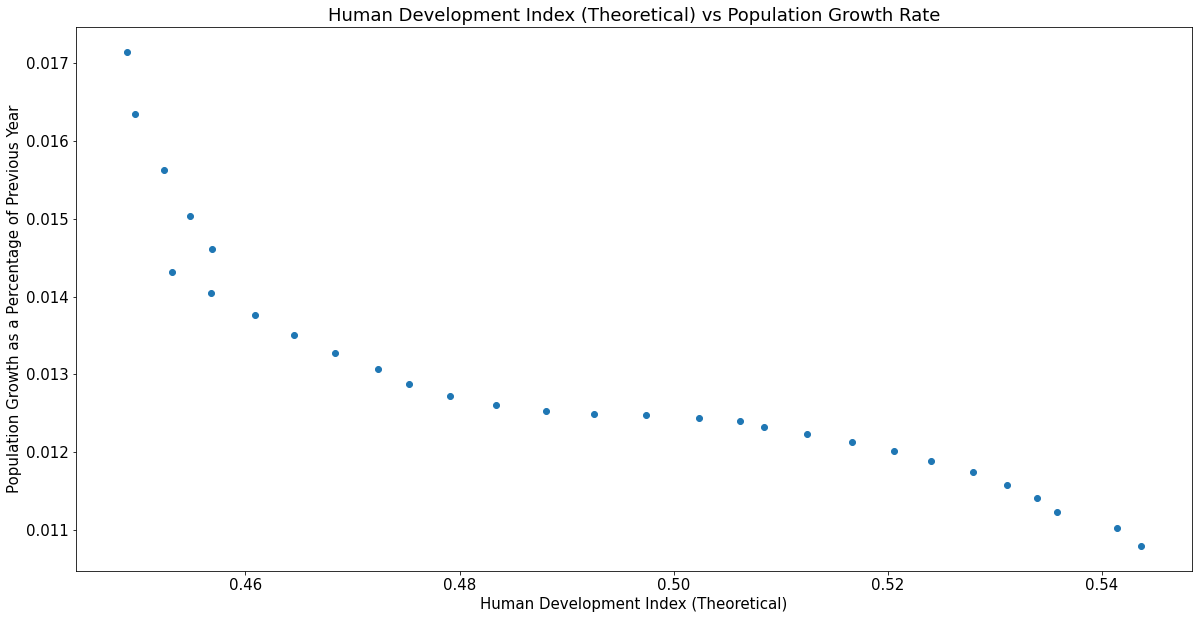

In [21]:
# Join theoretical HDI and growth rate into a new dataframe
hdi_vs_pop_growth = projected_indicators[['theoretical_hdi']].dropna().join(global_indicators.pop_growth_rate, how='inner')

# Plot the two sets of data
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(hdi_vs_pop_growth.theoretical_hdi, hdi_vs_pop_growth.pop_growth_rate)
plt.title('Human Development Index (Theoretical) vs Population Growth Rate')
plt.xlabel('Human Development Index (Theoretical)')
plt.ylabel('Population Growth as a Percentage of Previous Year')
plt.show()

From this plot, it appears that a negative correlation exists between HDI and population growth. As the global population becomes more developed, we experience a slowdown of population growth.

By fitting a trend line to this relationship, we'll be able to calculate population growth as a function of HDI.

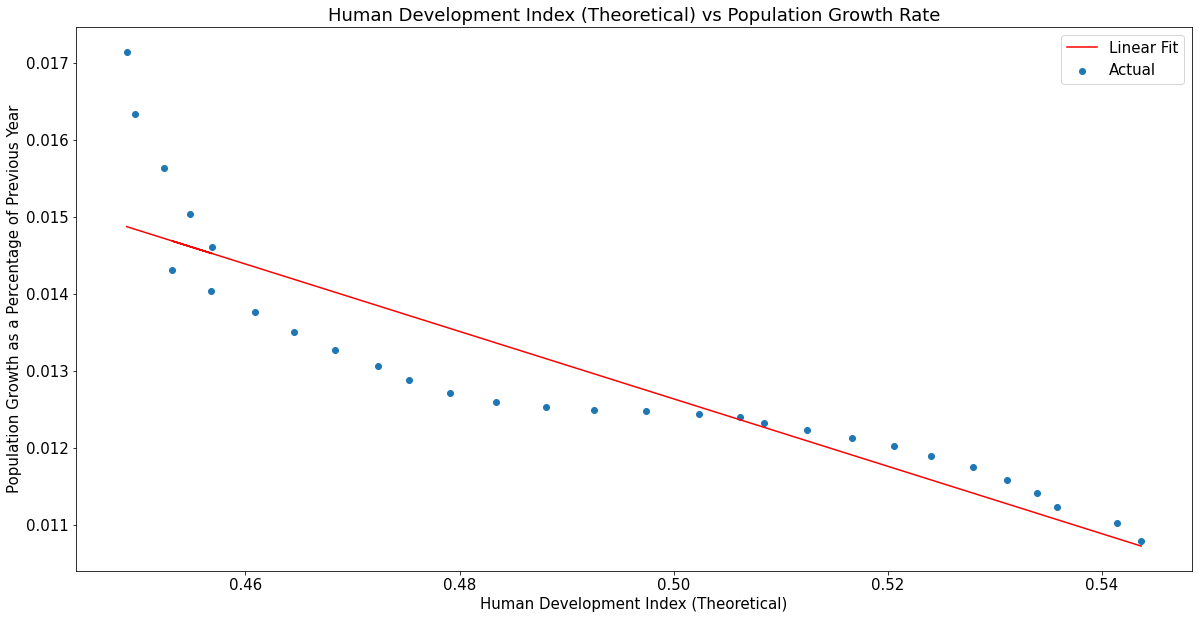

In [22]:
# Determine coeffeicient & constant for our linear regression
reg_m, reg_b = np.polyfit(hdi_vs_pop_growth.theoretical_hdi, hdi_vs_pop_growth.pop_growth_rate, deg=1)

# Plot the trendline over our previous plot
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(hdi_vs_pop_growth.theoretical_hdi, hdi_vs_pop_growth.pop_growth_rate, label='Actual')
plt.plot(
    hdi_vs_pop_growth.theoretical_hdi, 
    reg_m * hdi_vs_pop_growth.theoretical_hdi + reg_b, 
    color='red', label='Linear Fit')
plt.title('Human Development Index (Theoretical) vs Population Growth Rate')
plt.xlabel('Human Development Index (Theoretical)')
plt.ylabel('Population Growth as a Percentage of Previous Year')
plt.legend(loc='upper right')
plt.show()

---
## Projecting the Global Population

Now, we have all of the components needed to complete our model. Using our projected theoretical HDI to measure global development, we'll use the relationship between HDI and population growth rate to determine how the population will change each year.

In [23]:
# Forcast population growth rate based on previously calculated trendline

projected_pop_rate = (projected_indicators.theoretical_hdi.dropna() * reg_m + reg_b).rename('pop_growth_rate')
projected_pop_rate.tail()

year
2118   -0.001908
2119   -0.002021
2120   -0.002133
2121   -0.002246
2122   -0.002358
Name: pop_growth_rate, dtype: float64

Finally, we'll use these growth rates to predict the global population based on our most recent population figure.

In [24]:
# Define a new dataframe to hold the population
max_pop_year = global_indicators.population.dropna().index.max()
population_projection = pd.DataFrame({'year': range(max_pop_year, 2122+1)}).set_index('year').join(global_indicators.population).join(projected_pop_rate)

# Project future population based on projected growth rate and previous year's population
for _ in population_projection.iterrows():
    population_projection.population = (population_projection.population.shift(1) * (1 + population_projection.pop_growth_rate)).fillna(population_projection.population)
        
population_projection.tail()

,population,pop_growth_rate
year,,
2118,1.154990e+10,-0.001908
2119,1.152656e+10,-0.002021
2120,1.150197e+10,-0.002133
2121,1.147613e+10,-0.002246
2122,1.144907e+10,-0.002358


And there we go! Based on our model, we predict that the global population in 2122 will be about...
# 11.45 billion!

---
## Analysis and Conclusion

First, lets visualize the population growth trend our model predicts.

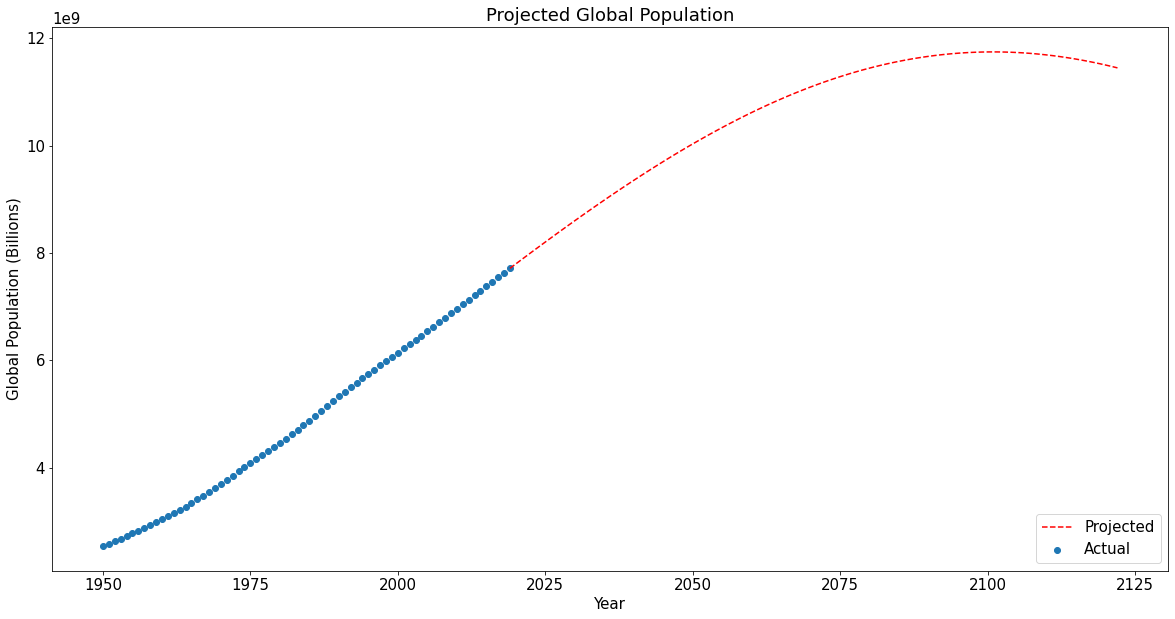

In [25]:
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.scatter(global_indicators.loc[1950:].index, global_indicators.loc[1950:].population, label='Actual')
plt.plot(
    population_projection.index, 
    population_projection.population, 
    color='red', linestyle='dashed', label='Projected')
plt.title('Projected Global Population')
plt.xlabel('Year')
plt.ylabel('Global Population (Billions)')
plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))
plt.legend(loc='lower right')
plt.show()

We see an interesting trend in population growth over the next century. Due to our decision to predict population based on indicators of human development, we note that slowing population growth results in a peak around year 2100, after which the global population begins to decline.

This aligns with the findings of some demographers, who suggest that a country's development results in its total fertility rate declining following a demographic transition. After a certain point, the fertility rate falls below the necessary rate to replace the population, leading to a negative growth rate.

We can further examine this effect by visualizing our projected HDI against our projected population rate.

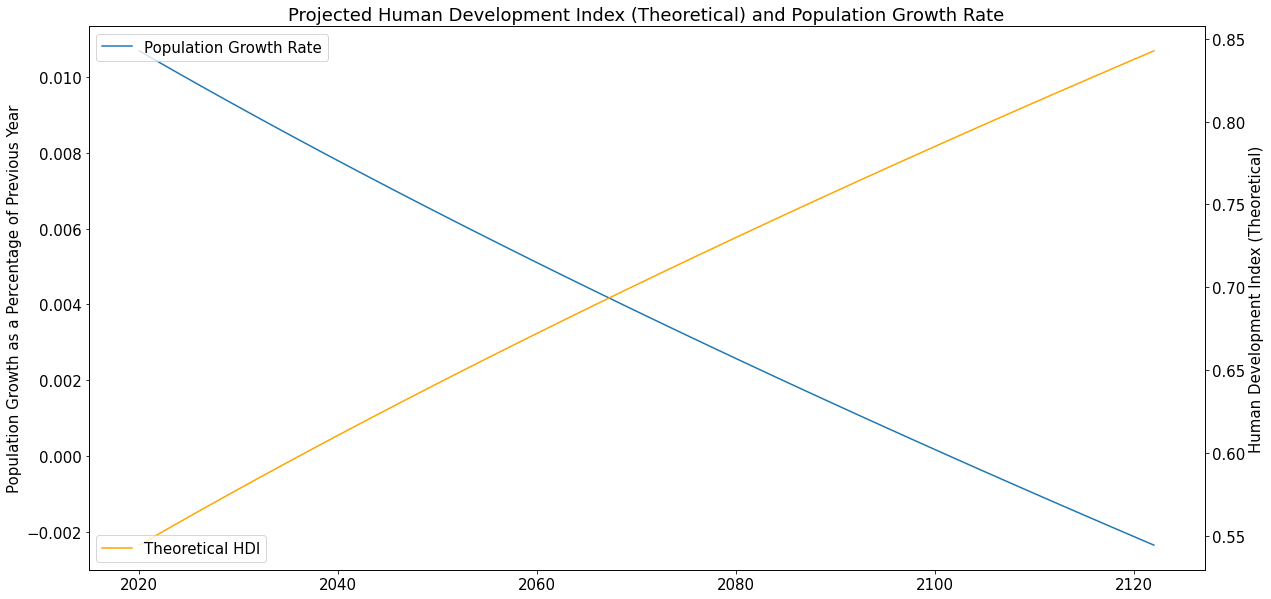

In [26]:
plt.figure(figsize=PLOT_SIZE)
plt.rc('font', size=FONT_SIZE) 
plt.plot(population_projection.loc[2020:].index, population_projection.pop_growth_rate.loc[2020:], label='Population Growth Rate')
plt.ylabel('Population Growth as a Percentage of Previous Year')
plt.legend(loc='upper left')
ax_twin = plt.twinx()
plt.plot(projected_indicators.loc[2020:].index, projected_indicators.theoretical_hdi.loc[2020:], color='orange', label='Theoretical HDI')
plt.title('Projected Human Development Index (Theoretical) and Population Growth Rate')
plt.xlabel('Human Development Index (Theoretical)')
ax_twin.set_ylabel('Human Development Index (Theoretical)')
ax_twin.legend(loc='lower left')
plt.show()

Over time, our model upholds the negative correlation between development indicators and population growth.

### Considerations of our Model

A critical dimension absent from our model is social pressure. Although social pressures may impact a particular country’s population, it isn’t the simplest to generalize. It would be hard use historic data, for example, to quantify the impending consequences of climate change. It would be nearly impossible to anticipate a failed state, or a world war, or perhaps a pandemic. It’s difficult to disregard the impact these events would have on the global population, but we elected to choose more generalized data for our model.

Additionally, there is inherently a bias present when attempting to globalize data that is recorded on a country level. More complete data will be available for developed nations, which may overestimate our chosen indicators when applied globally. This may lead to our projection estimating a higher rate of development than actuality. 

Lastly, we’re comfortable admitting that these indicators may not follow a linear path at all, and that our approach may be rudimentary in scope. From the trends in our data, however, we anticipate that development will, at least, continue globally, and we're confident in our decision to base our model on indicators of development. We’re looking forward to learning more over the course of this semester about machine learning methods to improve upon our initial model.

---
## Appendix

### Data Sources

> **Population Data**: *Population by country, available from 1800 to 2021 based on Gapminder data, HYDE, and UN Population Division (2019) estimates.* Retrieved from https://ourworldindata.org/grapher/population-since-1800
> 
> **Life Expectancy Data**: *James C. Riley (2005) – Estimates of Regional and Global Life Expectancy, 1800–2001. Issue Population and Development Review. Population and Development Review. Volume 31, Issue 3, pages 537–543, September 2005., Zijdeman, Richard; Ribeira da Silva, Filipa, 2015, "Life Expectancy at Birth (Total)", http://hdl.handle.net/10622/LKYT53, IISH Dataverse, V1, and UN Population Division (2019)* Retrieved from https://ourworldindata.org/grapher/life-expectancy
> 
> **Mean Years of Schooling Data**: *Average Total Years Of Schooling For Adult Population (Lee-Lee (2016), Barro-Lee (2018) And UNDP (2018))* Retrieved from https://ourworldindata.org/grapher/mean-years-of-schooling-1
> 
> **Expected Years of Schooling Data**: *United Nations Development Programme (UNDP) Human Development Reports (HDR), which combines data from: UNESCO Institute for Statistics (2018); ICF Macro Demographic and Health Surveys; UNICEF Multiple Indicator Cluster Surveys; and OECD (2017a).* Retrieved from https://ourworldindata.org/grapher/expected-years-of-schooling
> 
> **GNI per Capita Data**: *GNI per capita based on purchasing power parity (PPP). World Development Indicators - World Bank (2021.07.30)* Retrieved from https://ourworldindata.org/grapher/gross-national-income-per-capita

### References

> *The 2019 Revision of World Population Prospects*, The United Nations Department of Economic and Social Affairs. Retrieved from https://population.un.org/wpp/
> 
> *Population Indicators*, The Population Reference Bureau. Retrieved from https://www.prb.org/international/ 
>
> *World Population Estimates and Projections*, United States Census Bureau. Retrieved from https://www.census.gov/programs-surveys/international-programs/about/idb.html
>
> *Fertility, mortality, migration, and population scenarios
for 195 countries and territories from 2017 to 2100*, S. E. Vollset et. al., University of Washington (2020). Retrieved from https://www.thelancet.com/pdfs/journals/lancet/PIIS0140-6736(20)30677-2.pdf
>
> *Demographic Transition*, Wikipedia entry. Retireved from https://en.wikipedia.org/wiki/Demographic_transition
>
> *Human Development Index*, Wikipedia entry. Retrieved from https://en.wikipedia.org/wiki/Human_Development_Index